In [1]:
%matplotlib inline
import pandas as pd
import pickle
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# The dataset elements
CEMENT = 'Cement (component 1)(kg in a m^3 mixture)'
SLAG ='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
ASH = 'Fly Ash (component 3)(kg in a m^3 mixture)'
WATER = 'Water  (component 4)(kg in a m^3 mixture)'
SP = 'Superplasticizer (component 5)(kg in a m^3 mixture)'
COARSE_AGG = 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
FINE_AGG = 'Fine Aggregate (component 7)(kg in a m^3 mixture)'
AGE = 'Age (day)'
STRENGTH = 'Concrete compressive strength(MPa, megapascals) '

FILE_NAME = 'processed_data.pickle'

## Overview

## Utility Functions

In [2]:
def get_column_names(target_col_name = STRENGTH):
    x_cols = list(df.columns.values)
    x_cols.remove(target_col_name) 
    return x_cols, [target_col_name]

## Data Analysis and Preparation

### Load Data Set

In [3]:
df = pd.read_excel('Concrete_Data.xls')

# get features and target column names
x_col_names, y_col_name = get_column_names()

### A look at the data

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Data Set Characteristics

We will take a look at the data types and some general information about the feature distributions.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Also, as expected, there are no missing values in the dataset.

In [7]:
df.isnull().values.any()

False

### Split Training - Test Data Sets

In [8]:
X = df[x_col_names]
y = df[y_col_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Check the splits:

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(824, 8) (824, 1) (206, 8) (206, 1)


### Scaling the data
We will use the min-max scaler to bring all features in the same range.

In [11]:
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train.values)
X_test = pipeline.transform(X_test.values)

### Save the processed data
The data that has been processed will be saved so it is available to all ml notebooks.

In [12]:
obj= {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
     }

file_obj = open(FILE_NAME, 'wb')
pickle.dump(obj, file_obj)
file_obj.close()

### Data Visualizations

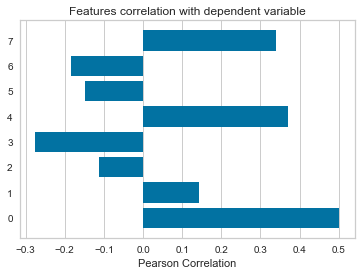

In [13]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation


# Instantiate the visualizer
visualizer = FeatureCorrelation()

visualizer.fit(X_train, y_train[STRENGTH])        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

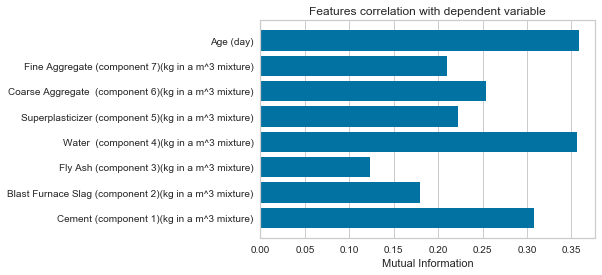

In [14]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation


# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression')

visualizer.fit(X, y[STRENGTH])        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure